In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 

In [6]:
df=pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\homeprice_cat.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [7]:
dummies=pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [9]:
df_n=pd.concat([df,dummies],axis="columns")
df_n

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [15]:
dfn=df_n.drop(['town','west windsor'],axis='columns')
dfn

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [20]:
x=dfn.drop("price",axis='columns')
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [22]:
y=dfn.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [23]:
reg=LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
r=reg.fit(x,y)

In [29]:
r.predict([[2800,0,1]])

array([590775.63964739])

In [31]:
r.predict([[3800,0,0]])

array([732000.64502256])

In [33]:
r.score(x,y)*100

95.73929037221873

In [34]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


## One Hot Encoder on DataFrame

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
ndf=df
ndf

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [37]:
le

LabelEncoder()

In [41]:
ndf.town=le.fit_transform(ndf.town)
ndf

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [61]:
x=ndf[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [62]:
y=ndf.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')
ct

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('town',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 [0])],
                  verbose=False)

In [68]:
x=ct.fit_transform(x)
x

array([[1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [66]:
x=x[:,1:]

In [67]:
x

array([[0.0e+00, 2.6e+03],
       [0.0e+00, 3.0e+03],
       [0.0e+00, 3.2e+03],
       [0.0e+00, 3.6e+03],
       [0.0e+00, 4.0e+03],
       [1.0e+00, 2.6e+03],
       [1.0e+00, 2.8e+03],
       [1.0e+00, 3.3e+03],
       [1.0e+00, 3.6e+03],
       [0.0e+00, 2.6e+03],
       [0.0e+00, 2.9e+03],
       [0.0e+00, 3.1e+03],
       [0.0e+00, 3.6e+03]])

In [73]:
mod=r.fit(x,y)
mod

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
mod.coef_

array([-14022.74019329,  14022.74019329,    121.52359295])

In [75]:
mod.intercept_

252292.21148379706

In [76]:
mod.predict([[0,1,3400]])

array([679495.16770893])

In [77]:
mod.predict([[1,0,2800]])

array([578535.53155202])

In [78]:
mod.score(x,y)

0.9223634895538951

# case study

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [22]:
df=pd.read_csv("C:\\Users\\dell\\OneDrive\\Desktop\\carprice_cat.csv")
df

,CarModel,Mileage,SellPrice,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
temp=pd.get_dummies(df.CarModel)
temp

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [58]:
newdf=pd.concat([df,temp],axis='columns')
newdf

,CarModel,Mileage,SellPrice,Age,Audi A5,BMW X5,Mercedez Benz C class
0,1,69000,18000,6,0,1,0
1,1,35000,34000,3,0,1,0
2,1,57000,26100,5,0,1,0
3,1,22500,40000,2,0,1,0
4,1,46000,31500,4,0,1,0
5,0,59000,29400,5,1,0,0
6,0,52000,32000,5,1,0,0
7,0,72000,19300,6,1,0,0
8,0,91000,12000,8,1,0,0
9,2,67000,22000,6,0,0,1


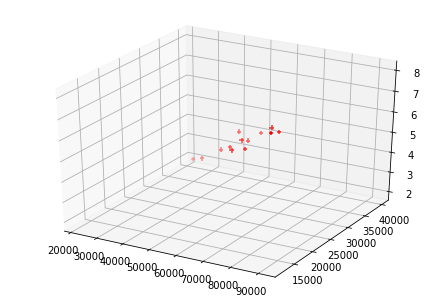

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(newdf.Mileage,newdf.SellPrice,newdf.Age,marker='+',color='red')
#ax.plot(x.Mileage,x.Age,model.predict([['Mileage','Age','Audi A5','BMW X5']]) ,'model', label='Linear Regression')


In [6]:
newdf
newdf=newdf.drop(['CarModel','Mercedez Benz C class'],axis='columns')
newdf

,Mileage,SellPrice,Age,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [7]:
y=newdf.SellPrice
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: SellPrice, dtype: int64

In [8]:
reg=LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
newdf=newdf.drop(['SellPrice'],axis='columns')
newdf

,Mileage,Age,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [10]:
x=newdf
x

,Mileage,Age,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [11]:
model=reg.fit(x,y)

In [12]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.intercept_

58976.625968537235

In [14]:
model.coef_

array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03])

In [15]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

In [16]:
model.predict([[86000,7,0,1]])

array([11080.74313219])

In [18]:
model.score(x,y)*100

94.17050937281083

# Car price prediction by using One Hot Encoder

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
dfle=df
dfle

,CarModel,Mileage,SellPrice,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [25]:
dfle.CarModel=le.fit_transform(dfle.CarModel)
dfle

,CarModel,Mileage,SellPrice,Age
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [26]:
x=dfle[['CarModel','Mileage','Age']].values
x

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [27]:
y=dfle.SellPrice.values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [30]:
ct=ColumnTransformer([('CarModel',OneHotEncoder(),[0])],remainder='passthrough')
ct

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('CarModel',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 [0])],
                  verbose=False)

In [31]:
x=ct.fit_transform(x)
x

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [32]:
x=x[:,1:]
x

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [33]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
model.intercept_

56523.08523128357

In [35]:
model.coef_

array([-4.28466659e+03,  2.45354074e+03, -3.70122094e-01, -1.33245363e+03])

In [37]:
model.predict([[0,1,45000,4]])

array([36991.31721062])

In [39]:
model.predict([[1,0,86000,7]])

array([11080.74313219])

In [44]:
model.score(x,y)*100

94.17050937281083

# TO STORE MODEL

In [46]:
from sklearn.externals import joblib
joblib.dump(model,'modeljoblibOHE')

['modeljoblibOHE']

In [49]:
mjohe=joblib.load('modeljoblibOHE')
mjohe

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
mjohe.intercept_

56523.08523128357

In [51]:
mjohe.coef_

array([-4.28466659e+03,  2.45354074e+03, -3.70122094e-01, -1.33245363e+03])

In [54]:
mjohe.score(x,y)

0.9417050937281083